<a href="https://colab.research.google.com/github/KayKozaronek/03_Courses/blob/master/IMDB_Reviews_with_GRU_(and_optional_LSTM_and_Conv1D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [3]:
imdb, info = tfds.load("imdb_reviews", with_info = True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteR5EQRL/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteR5EQRL/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteR5EQRL/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [0]:
train_data, test_data = imdb["train"], imdb["test"]
training_sentences =[]
training_labels = []

testing_sentences =[]
testing_labels =[]

In [0]:
# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = "post"
padding_type ="post"
oov_tok = "<OOV>"

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, 
                       maxlen = max_length,
                       padding= padding_type,
                       truncating = trunc_type)

testing_sequence = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequence,
                               maxlen = max_length,
                               padding = padding_type,
                               truncating = trunc_type)

In [8]:
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])

def decode_review(text):
  return " ".join([reverse_word_index.get(i,"?") for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all ' ? ? ? ? ? ? ?
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [0]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim = vocab_size,
                                  output_dim = embedding_dim,
                                  input_length = max_length),
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
        tf.keras.layers.Dense(6, activation = "relu"),
        tf.keras.layers.Dense(1, activation ="sigmoid")
])

In [0]:
model.compile(
    loss ="binary_crossentropy",
    optimizer = "adam",
    metrics =["accuracy"]
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 50 
history = model.fit(
    padded,
    training_labels_final,
    validation_data = (testing_padded, testing_labels_final),
    epochs = num_epochs,
    verbose = 1 )

Epoch 1/50
782/782 [==============================] - 47s 60ms/step - loss: 0.6750 - accuracy: 0.5524 - val_loss: 0.6769 - val_accuracy: 0.5000
Epoch 2/50
782/782 [==============================] - 46s 59ms/step - loss: 0.4561 - accuracy: 0.7714 - val_loss: 0.4037 - val_accuracy: 0.8234
Epoch 3/50
782/782 [==============================] - 46s 59ms/step - loss: 0.2923 - accuracy: 0.8822 - val_loss: 0.4066 - val_accuracy: 0.8259
Epoch 4/50
782/782 [==============================] - 46s 59ms/step - loss: 0.2268 - accuracy: 0.9142 - val_loss: 0.4202 - val_accuracy: 0.8204
Epoch 5/50
782/782 [==============================] - 46s 59ms/step - loss: 0.1748 - accuracy: 0.9377 - val_loss: 0.4843 - val_accuracy: 0.8071
Epoch 6/50
782/782 [==============================] - 46s 59ms/step - loss: 0.1270 - accuracy: 0.9568 - val_loss: 0.5352 - val_accuracy: 0.8078
Epoch 7/50
782/782 [==============================] - 46s 59ms/step - loss: 0.0847 - accuracy: 0.9745 - val_loss: 0.7237 - val_accuracy:

In [0]:
import matplotlib.pyplot as plt 

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel = "Epochs"
  plt.ylabel = string
  plt.legend([string, "val_"+string])
  plt.show()

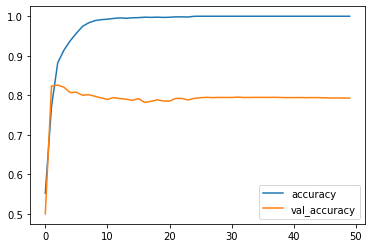

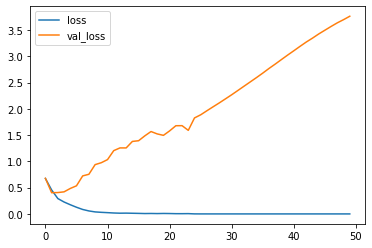

In [17]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [30]:
# Model Definition with LSTM
model2 = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim= vocab_size,
                                  output_dim = embedding_dim,
                                  input_length = max_length),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(6, activation ="relu"),
        tf.keras.layers.Dense(1, activation = "sigmoid")
])

model2.compile(loss = "binary_crossentropy",
               optimizer = "adam",
               metrics =["accuracy"])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [36]:
num_epochs = 10
history2 = model2.fit(padded,
                    training_labels_final,
                    epochs = num_epochs,
                    verbose = 1,
                    validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 47s 60ms/step - loss: 0.4868 - accuracy: 0.7491 - val_loss: 0.4501 - val_accuracy: 0.8132
Epoch 2/10
782/782 [==============================] - 46s 59ms/step - loss: 0.3012 - accuracy: 0.8784 - val_loss: 0.4163 - val_accuracy: 0.8173
Epoch 3/10
782/782 [==============================] - 46s 59ms/step - loss: 0.2444 - accuracy: 0.9071 - val_loss: 0.4359 - val_accuracy: 0.8204
Epoch 4/10
782/782 [==============================] - 46s 59ms/step - loss: 0.2005 - accuracy: 0.9267 - val_loss: 0.4916 - val_accuracy: 0.8092
Epoch 5/10
782/782 [==============================] - 47s 60ms/step - loss: 0.1693 - accuracy: 0.9388 - val_loss: 0.4792 - val_accuracy: 0.7994
Epoch 6/10
782/782 [==============================] - 47s 60ms/step - loss: 0.1454 - accuracy: 0.9490 - val_loss: 0.6567 - val_accuracy: 0.8037
Epoch 7/10
782/782 [==============================] - 47s 59ms/step - loss: 0.1274 - accuracy: 0.9579 - val_loss: 0.5799 - val_accuracy:

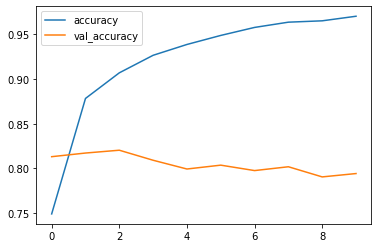

In [37]:
plot_graphs(history2, "accuracy")

In [11]:
# Model Definition with Conv1D
model3 = tf.keras.Sequential([
         tf.keras.layers.Embedding(input_dim = vocab_size,
                                   output_dim = embedding_dim,
                                   input_length = max_length),
         tf.keras.layers.Conv1D(128, 5, activation = "relu"),
         tf.keras.layers.GlobalAveragePooling1D(),
         tf.keras.layers.Dense(6, activation = "relu"),
         tf.keras.layers.Dense(1, activation = "sigmoid")
])

model3.compile(loss = "binary_crossentropy",
               optimizer = "adam",
               metrics = ["accuracy"])
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 10 
history3 = model3.fit(padded,
                     training_labels_final,
                     verbose = 1,
                     epochs = num_epochs,
                     validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 9s 12ms/step - loss: 0.4401 - accuracy: 0.7839 - val_loss: 0.3745 - val_accuracy: 0.8331
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2779 - accuracy: 0.8868 - val_loss: 0.3971 - val_accuracy: 0.8250
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2264 - accuracy: 0.9117 - val_loss: 0.4271 - val_accuracy: 0.8220
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1891 - accuracy: 0.9298 - val_loss: 0.4608 - val_accuracy: 0.8198
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1572 - accuracy: 0.9451 - val_loss: 0.5419 - val_accuracy: 0.8067
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1310 - accuracy: 0.9570 - val_loss: 0.5991 - val_accuracy: 0.8040
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1043 - accuracy: 0.9682 - val_loss: 0.6413 - val_accuracy: 0.8038

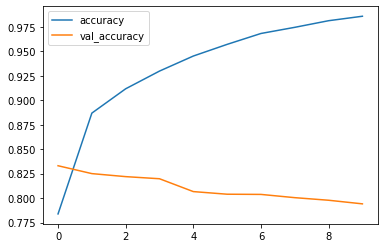

In [13]:
plot_graphs(history3, "accuracy")